#### main

In [370]:
import pandas as pd
import numpy as np
import logging
import json
import matplotlib
import matplotlib.pyplot as plt
import sys
import io
import datetime
import os

from datetime import datetime
from datetime import timedelta
from time import time
from time import sleep
from collections import Counter

In [401]:
!pip3 install -U scikit-learn

Looking in indexes: https://nexus.eniram.io/repository/python/simple
     |████████████████████████████████| 19.9 MB 4.6 MB/s eta 0:00:01    |▊                               | 419 kB 142 kB/s eta 0:02:17     |██▎                             | 1.4 MB 516 kB/s eta 0:00:36     |███▉                            | 2.4 MB 724 kB/s eta 0:00:25     |████▍                           | 2.7 MB 724 kB/s eta 0:00:24     |████████▉                       | 5.5 MB 798 kB/s eta 0:00:19     |███████████████                 | 9.3 MB 1.2 MB/s eta 0:00:09     |███████████████████▋            | 12.2 MB 1.3 MB/s eta 0:00:06     |███████████████████▉            | 12.3 MB 1.3 MB/s eta 0:00:06
Requirement already up-to-date: scipy==1.3.2 in ./.virtualenvs/enipy2020-py36/lib/python3.6/site-packages (from -c /home/enipandav/.virtualenvs/enipy2020-py36/lib/python3.6/site-packages/wartsila_enipy/axes/enipy2020/constraints.txt (line 9)) (1.3.2)
Requirement already up-to-date: numpy==1.18.1 in ./.virtualenvs/enipy2020-

In [402]:
import sklearn

In [558]:
import seaborn as sns

from scipy import stats
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [373]:
matplotlib.__version__

'3.1.1'

#### start

In [2]:
xlsx = pd.ExcelFile('casestudy.xlsx')

In [33]:
dfa = pd.read_excel(xlsx, 'City_A')
dfb = pd.read_excel(xlsx, 'City_B')
dfc = pd.read_excel(xlsx, 'City_C')
dfd = pd.read_excel(xlsx, 'City_D')
dfe = pd.read_excel(xlsx, 'City_E')
df = pd.concat([dfa,dfb,dfc,dfd,dfe], sort=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49064 entries, 0 to 4816
Data columns (total 11 columns):
#                          49064 non-null int64
ADR_USD                    49064 non-null float64
accommadation_type_name    27298 non-null object
accommodation_type_name    21766 non-null object
booking_date               49064 non-null datetime64[ns]
chain_hotel                49064 non-null object
checkin_date               49064 non-null datetime64[ns]
checkout_date              49064 non-null datetime64[ns]
city_id                    49064 non-null int64
hotel_id                   49064 non-null int64
star_rating                49064 non-null float64
dtypes: datetime64[ns](3), float64(2), int64(3), object(3)
memory usage: 4.5+ MB


In [34]:
# different column name under 'accommadation_type_name' and 'accommodation_type_name'

df['accom_type'] = df['accommadation_type_name'].fillna('').astype(str) + \
                   df['accommodation_type_name'].fillna('').astype(str)

In [35]:
# remove excess accommodation_type_name columns

df.drop(['accommadation_type_name','accommodation_type_name'], axis=1, inplace=True)

In [80]:
# state the duration of booking period
# state the duration of stay period

df['stay_duration'] = df['checkout_date'] - df['checkin_date']
df['book_duration'] = df['checkin_date'] - df['booking_date']
df.reset_index(inplace=True)

In [81]:
df.head()

,index,#,ADR_USD,booking_date,chain_hotel,checkin_date,checkout_date,city_id,hotel_id,star_rating,accom_type,stay_duration,book_duration
0,0,1,71.06,2016-08-02,non-chain,2016-10-01,2016-10-02,9395,297388,2.5,Hotel,1 days,60 days
1,1,2,76.56,2016-08-02,non-chain,2016-10-01,2016-10-02,9395,298322,3.0,Hotel,1 days,60 days
2,2,3,153.88,2016-08-02,chain,2016-10-01,2016-10-02,9395,2313076,5.0,Hotel,1 days,60 days
3,3,4,126.60,2016-08-04,non-chain,2016-10-02,2016-10-03,9395,2240838,3.5,Hotel,1 days,59 days
4,4,5,115.08,2016-08-04,non-chain,2016-10-02,2016-10-03,9395,2240838,3.5,Hotel,1 days,59 days


#### looking at graphs to intepret data

In [51]:
df_accom_cluster

accom_type
Apartment                          239
Bungalow                           142
Capsule Hotel                      822
Guest House / Bed & Breakfast     2758
Holiday Park / Caravan Park          3
Home                                14
Hostel                            2774
Hotel                            35441
Love Hotel                           3
Motel                               27
Private Villa                       18
Resort                            3525
Resort Villa                       397
Ryokan                             103
Serviced Apartment                2797
Villa                                1
Name: accom_type, dtype: int64

/home/enipandav/.virtualenvs/enipy2020-py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'left center'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


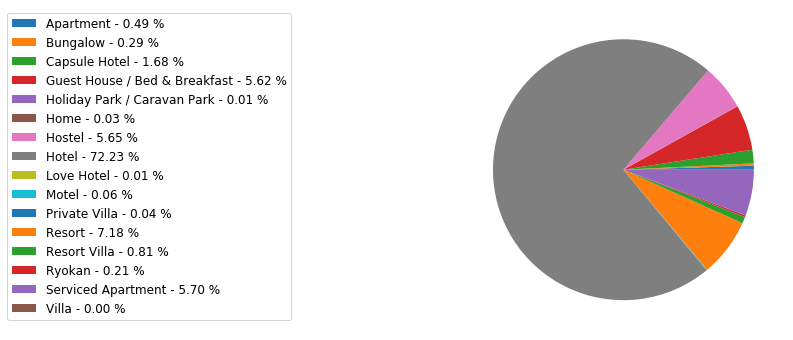

In [86]:
df_accom_cluster = df.groupby(['accom_type'])['accom_type'].count()
x = np.array(df_accom_cluster.index)
y = np.array(df_accom_cluster.values)
p = 100.*y/y.sum()

plt.figure(figsize=(6,6))
patches, texts = plt.pie(y)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, p)]

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.5,1), fontsize=12);
plt.show()

#### look at relationship between price and types of accom (generally)

In [450]:
len(df[df.accom_type=='Hotel'])

35441

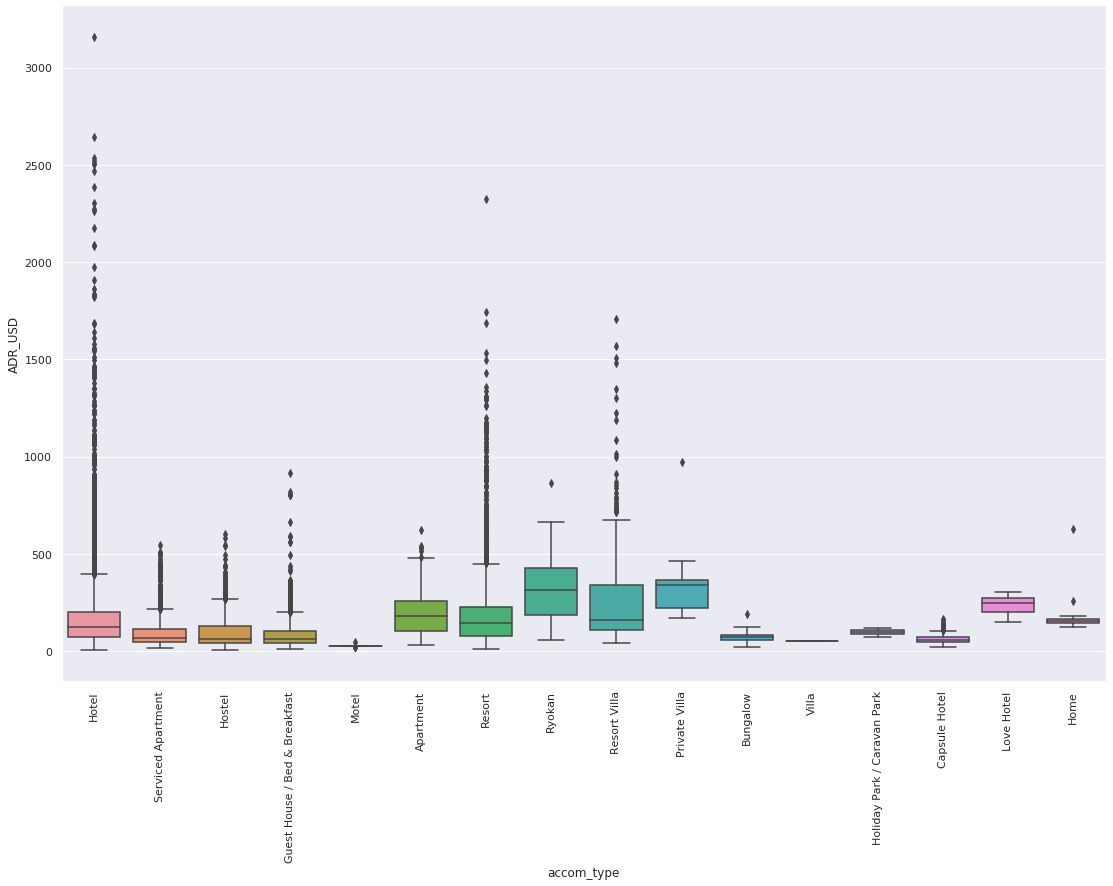

In [461]:
df1 = df.copy()
sns.catplot(x="accom_type", y="ADR_USD", kind="box", data=df1, height=10, aspect=20/13)
plt.xticks(rotation=90)
plt.show()

(0, 16)

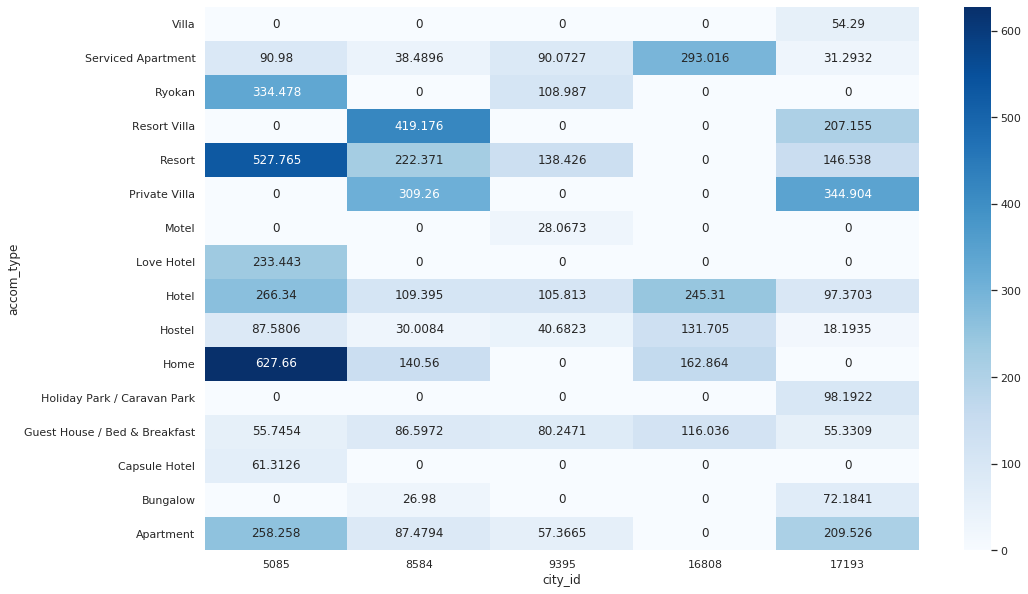

In [467]:
# break it down into different cities
# look at mean price of different accommodations in different cities

df1_cities = df1.groupby(['accom_type', 'city_id'])['ADR_USD'].mean()
df1_cities = df1_cities.reset_index()
df1_cities_pivot = df1_cities.pivot('accom_type', 'city_id', 'ADR_USD')
df1_cities_pivot = df1_cities_pivot.fillna(0.00)

fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(df1_cities_pivot, annot=True, ax=ax, cmap='Blues', fmt='g');
ax.set_ylim([0,16])

#### look at relationship between price and star rating

/home/enipandav/.virtualenvs/enipy2020-py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


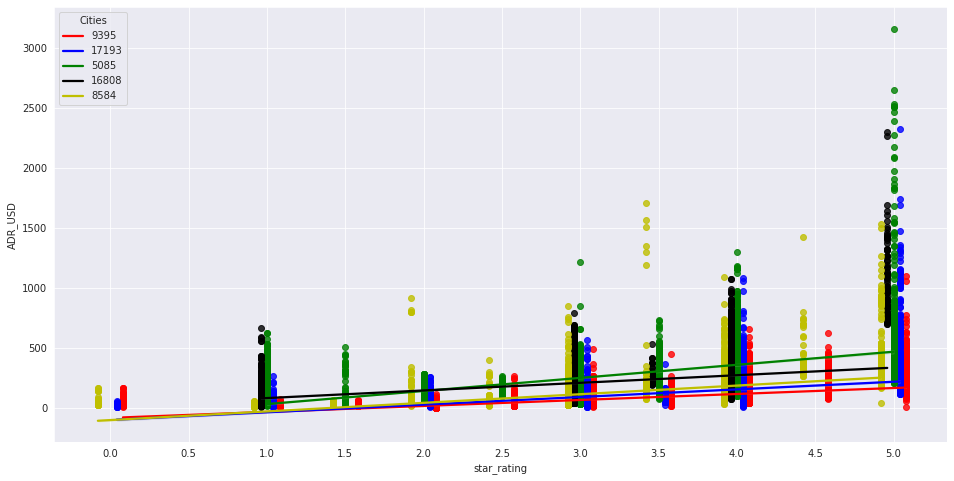

In [448]:
df1 = df.copy()
plt.figure(figsize=(16,8))
colors = ['r','b','g','k','y']
t = len(df1.city_id.unique())
space = list(np.linspace(-0.04*(t//2),0.04*(t//2),t))
cities = []
i=0

for city in df1.city_id.unique():
    df2 = df1[df1.city_id == city]
    df2['star_rating'] = df2['star_rating'] - space[i]
    sns.regplot(x='star_rating', y='ADR_USD', data=df2, color=colors[i])
    i+=1
    cities.append(city)

plt.xticks(np.arange(0,5.5,0.5))
plt.legend(loc='upper left', labels=cities, title='Cities')
plt.show()

#### looking at money generated

In [576]:
df.head()

,index,#,ADR_USD,booking_date,chain_hotel,checkin_date,checkout_date,city_id,hotel_id,star_rating,accom_type,stay_duration,book_duration
0,0,1,71.06,2016-08-02,non-chain,2016-10-01,2016-10-02,9395,297388,2.5,Hotel,1 days,60 days
1,1,2,76.56,2016-08-02,non-chain,2016-10-01,2016-10-02,9395,298322,3.0,Hotel,1 days,60 days
2,2,3,153.88,2016-08-02,chain,2016-10-01,2016-10-02,9395,2313076,5.0,Hotel,1 days,60 days
3,3,4,126.60,2016-08-04,non-chain,2016-10-02,2016-10-03,9395,2240838,3.5,Hotel,1 days,59 days
4,4,5,115.08,2016-08-04,non-chain,2016-10-02,2016-10-03,9395,2240838,3.5,Hotel,1 days,59 days


In [577]:
df_sum = df.copy()
df_sum['sum'] = df_sum['ADR_USD'] * (df_sum['stay_duration']/np.timedelta64(1,'D'))
df_sum.head()

,index,#,ADR_USD,booking_date,chain_hotel,checkin_date,checkout_date,city_id,hotel_id,star_rating,accom_type,stay_duration,book_duration,sum
0,0,1,71.06,2016-08-02,non-chain,2016-10-01,2016-10-02,9395,297388,2.5,Hotel,1 days,60 days,71.06
1,1,2,76.56,2016-08-02,non-chain,2016-10-01,2016-10-02,9395,298322,3.0,Hotel,1 days,60 days,76.56
2,2,3,153.88,2016-08-02,chain,2016-10-01,2016-10-02,9395,2313076,5.0,Hotel,1 days,60 days,153.88
3,3,4,126.60,2016-08-04,non-chain,2016-10-02,2016-10-03,9395,2240838,3.5,Hotel,1 days,59 days,126.60
4,4,5,115.08,2016-08-04,non-chain,2016-10-02,2016-10-03,9395,2240838,3.5,Hotel,1 days,59 days,115.08


In [578]:
# send to tableau for plot
df_sum.to_csv('agoda.csv')

#### assume booking period and price has correlation

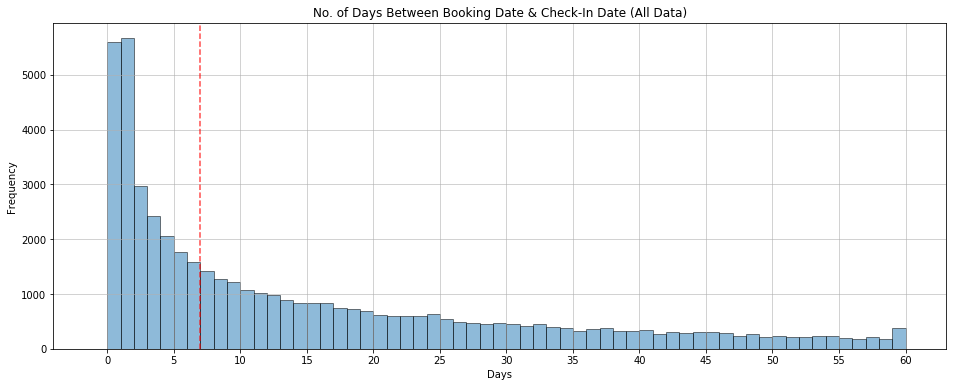


% of booking duration within 7 days from check-in date: 47.9%


In [113]:
# histogram of booking duration -->
# tiers of days between booking date and check in date
fig, axs = plt.subplots(figsize=(16,6))
axs.hist(df.book_duration/np.timedelta64(1,'D'), bins=61, stacked=False, alpha=0.5, ec='k')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('No. of Days Between Booking Date & Check-In Date (All Data)')
plt.grid(alpha=0.7);
plt.axvline(7, linestyle='--', alpha=0.7, color='r')
plt.xticks(np.arange(min(df.book_duration/np.timedelta64(1,'D'))+1, max(df.book_duration/np.timedelta64(1,'D'))+1, 5))
plt.show();

n = len(df[(df.book_duration/np.timedelta64(1,'D'))<=7])/len(df)*100
print('')
print('% of booking duration within 7 days from check-in date: {:.1f}%'.format(n))

% of booking duration within 7 days from check-in date in City 9395: 51.5%
% of booking duration within 7 days from check-in date in City 17193: 52.6%
% of booking duration within 7 days from check-in date in City 5085: 30.1%
% of booking duration within 7 days from check-in date in City 16808: 44.5%
% of booking duration within 7 days from check-in date in City 8584: 58.4%


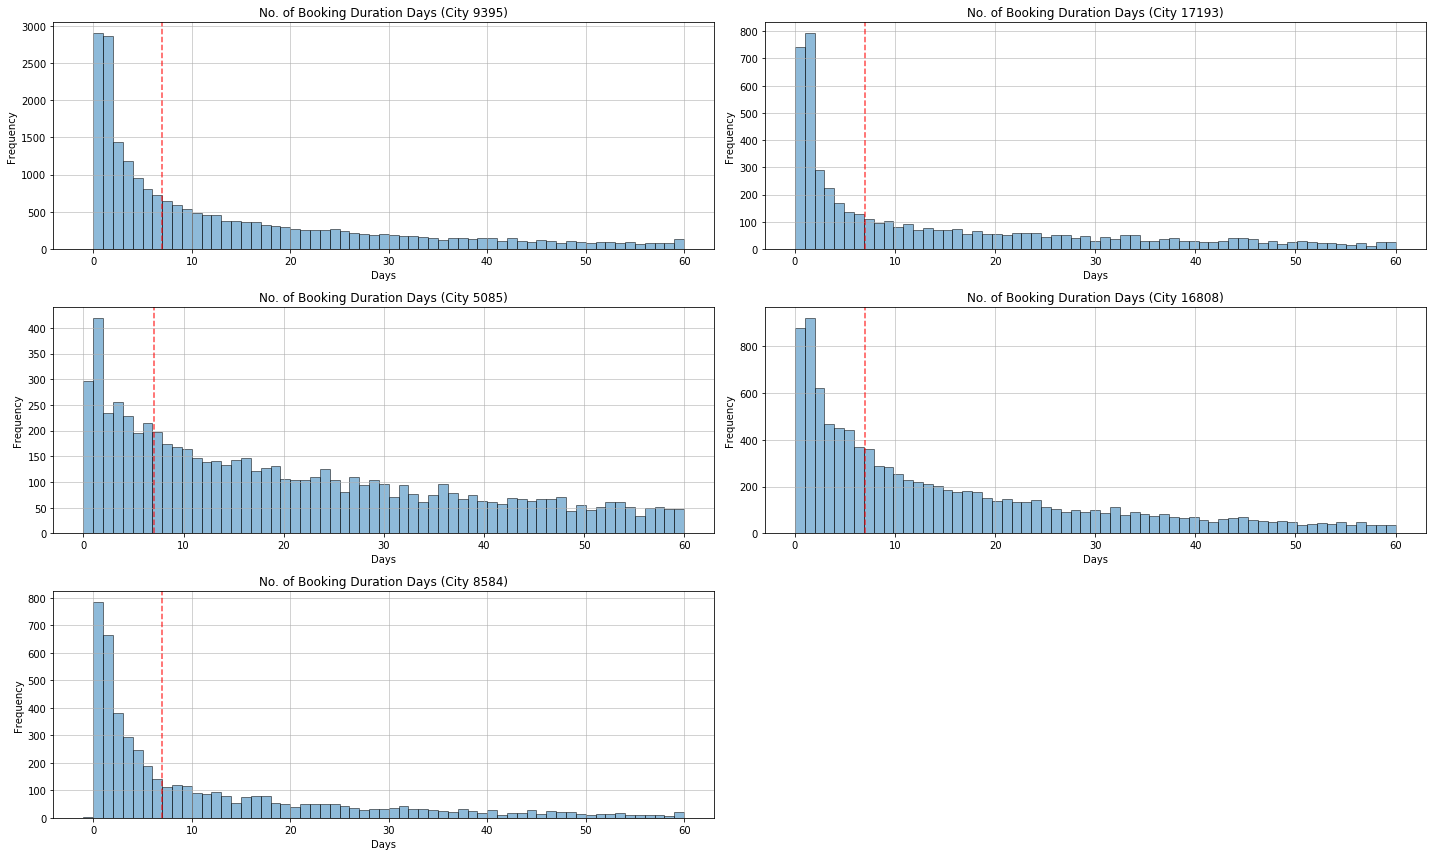

In [136]:
# histogram of each city booking duration
# tiers of days between booking date and check in date
no_col = 2
no_row = 3
plot_index = 1

plt.figure(figsize=(20,12))
for city in df.city_id.unique():
    df1 = df[df.city_id == city]
    plt.subplot(no_row, no_col, plot_index)
    plt.hist(df1.book_duration/np.timedelta64(1,'D'), bins=61, stacked=False, alpha=0.5, ec='k')
    plt.xlabel('Days')
    plt.ylabel('Frequency')
    plt.title('No. of Booking Duration Days (City {})'.format(city))
    plt.grid(alpha=0.7);
    plt.axvline(7, linestyle='--', alpha=0.7, color='r')
    plot_index = plot_index + 1

    n = len(df1[(df1.book_duration/np.timedelta64(1,'D'))<=7])/len(df1)*100
    print('% of booking duration within 7 days from check-in date in City {}: {:.1f}%'.format(city, n))
    
plt.tight_layout()
plt.show();n

In [296]:
# looking at most mentioned hotels in data
# objective is to compare price and booking_duration
(hotels, counts) = np.unique(df.hotel_id, return_counts=True)
frequencies = np.asarray((hotels, counts)).T # transpose the array
frequencies = frequencies.tolist() # convert from arrays to list
frequency = {}
for freq in frequencies: # create dictionary of hotel_id to number of counts mentioned in the data
    key, value = str(freq[0]), freq[1]
    frequency[key] = value
    
# top 10 hotel_id with most counts:
frequency_10 = dict(Counter(frequency).most_common(10))

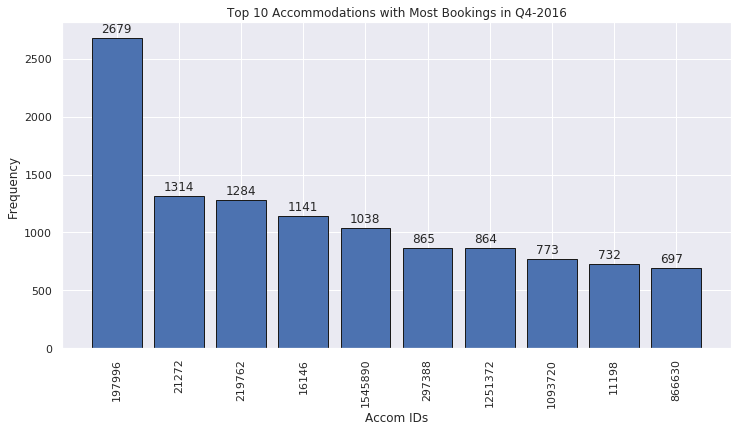

In [514]:
# top 10 booked_hotels with most counts
hotels1 = list(frequency_10.keys())
counts1 = sorted(counts, reverse=True)[:10]
plt.figure(figsize=(12,6))
plt.bar(np.arange(len(hotels1)), counts1, width=0.8, ec='k')
plt.title('Top 10 Accommodations with Most Bookings in Q4-2016')
plt.ylabel('Frequency')
plt.xlabel('Accom IDs')
xlocs, xlabs = plt.xticks()
xlocs = [i for i in range(0,10)]
for i, v in enumerate(counts1):
    plt.text(xlocs[i] - 0.25, v+50, str(v))
plt.xticks(np.arange(len(hotels1)), hotels1);
plt.xticks(rotation=90);

In [299]:
df[df.hotel_id==197996]

,index,#,ADR_USD,booking_date,chain_hotel,checkin_date,checkout_date,city_id,hotel_id,star_rating,accom_type,stay_duration,book_duration
21,21,22,42.10,2016-08-08,non-chain,2016-10-03,2016-10-04,9395,197996,3.5,Hotel,1 days,56 days
53,53,54,43.36,2016-08-12,non-chain,2016-10-08,2016-10-09,9395,197996,3.5,Hotel,1 days,57 days
60,60,61,41.70,2016-08-14,non-chain,2016-10-04,2016-10-05,9395,197996,3.5,Hotel,1 days,51 days
67,67,68,40.84,2016-08-14,non-chain,2016-10-08,2016-10-09,9395,197996,3.5,Hotel,1 days,55 days
68,68,69,53.52,2016-08-14,non-chain,2016-10-02,2016-10-03,9395,197996,3.5,Hotel,1 days,49 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22306,22306,22307,35.14,2016-12-30,non-chain,2016-12-30,2016-12-31,9395,197996,3.5,Hotel,1 days,0 days
22313,22313,22314,46.00,2016-12-30,non-chain,2016-12-31,2017-01-01,9395,197996,3.5,Hotel,1 days,1 days
22337,22337,22338,36.00,2016-12-30,non-chain,2016-12-31,2017-01-01,9395,197996,3.5,Hotel,1 days,1 days
22350,22350,22351,41.50,2016-12-31,non-chain,2016-12-31,2017-01-01,9395,197996,3.5,Hotel,1 days,0 days


In [238]:
# look at the type of accommodations in top 10 most bookings for Q4-2016
df.loc[df.hotel_id.isin(frequency_10)].groupby('accom_type')['hotel_id'].nunique()

accom_type
Hostel                1
Hotel                 8
Serviced Apartment    1
Name: hotel_id, dtype: int64

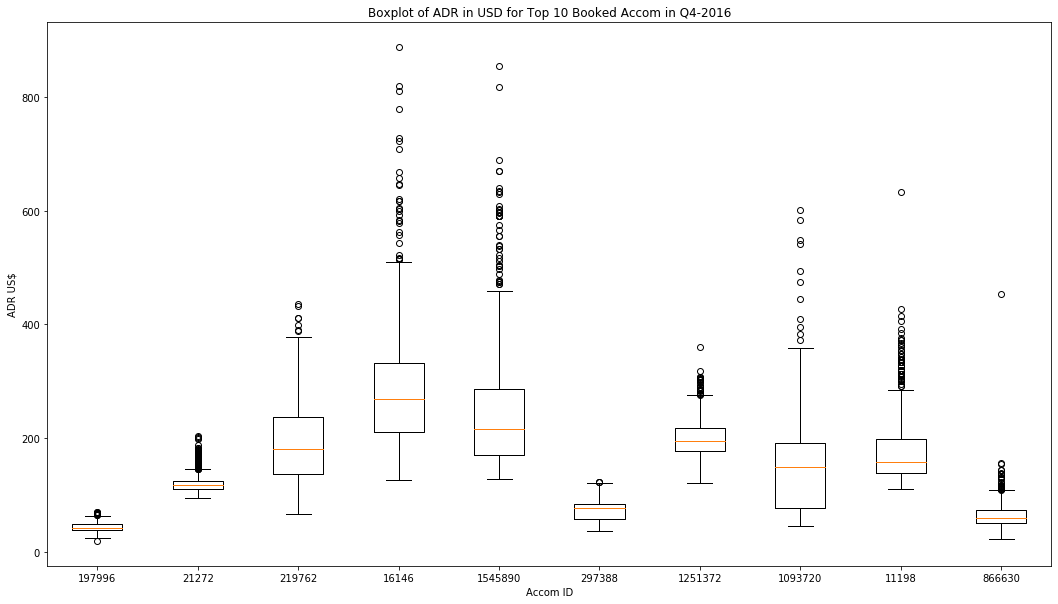

In [306]:
# look at boxplot of average price booked for top 10 most bookings accom
data_adr = []
labels = list(frequency_10.keys())
for box in frequency_10:
    df1 = df[df.hotel_id==int(box)]
    data_adr.append(tuple(df1['ADR_USD'].values))

plt.figure(figsize=(18,10))
plt.boxplot(data_adr, labels=labels)
plt.ylabel('ADR US$')
plt.xlabel('Accom ID')
plt.title('Boxplot of ADR in USD for Top 10 Booked Accom in Q4-2016')
plt.show()

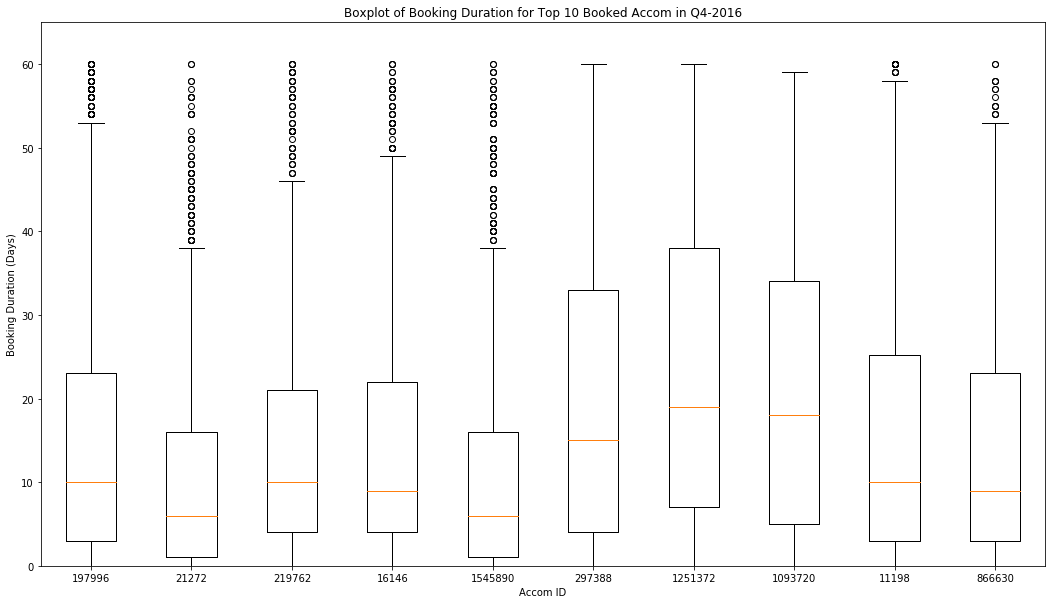

In [312]:
# look at boxplot of average booking duration booked for top 10 most bookings accom
data_dur = []
labels = list(frequency_10.keys())
for box in frequency_10:
    df1 = df[df.hotel_id==int(box)]
    data_dur.append(tuple(df1['book_duration'].values/np.timedelta64(1,'D')))

plt.figure(figsize=(18,10))
plt.boxplot(data_dur, labels=labels)
plt.ylabel('Booking Duration (Days)')
plt.xlabel('Accom ID')
plt.title('Boxplot of Booking Duration for Top 10 Booked Accom in Q4-2016')
plt.ylim((0,65))
plt.show()

/home/enipandav/.virtualenvs/enipy2020-py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Accom 197996 (City 9395): 0.15
Accom 21272 (City 9395): 0.12
Accom 219762 (City 16808): 0.14
Accom 16146 (City 16808): 0.07
Accom 1545890 (City 16808): 0.0
Accom 297388 (City 9395): 0.12
Accom 1251372 (City 5085): 0.2
Accom 1093720 (City 16808): 0.02
Accom 11198 (City 16808): -0.16
Accom 866630 (City 9395): 0.13


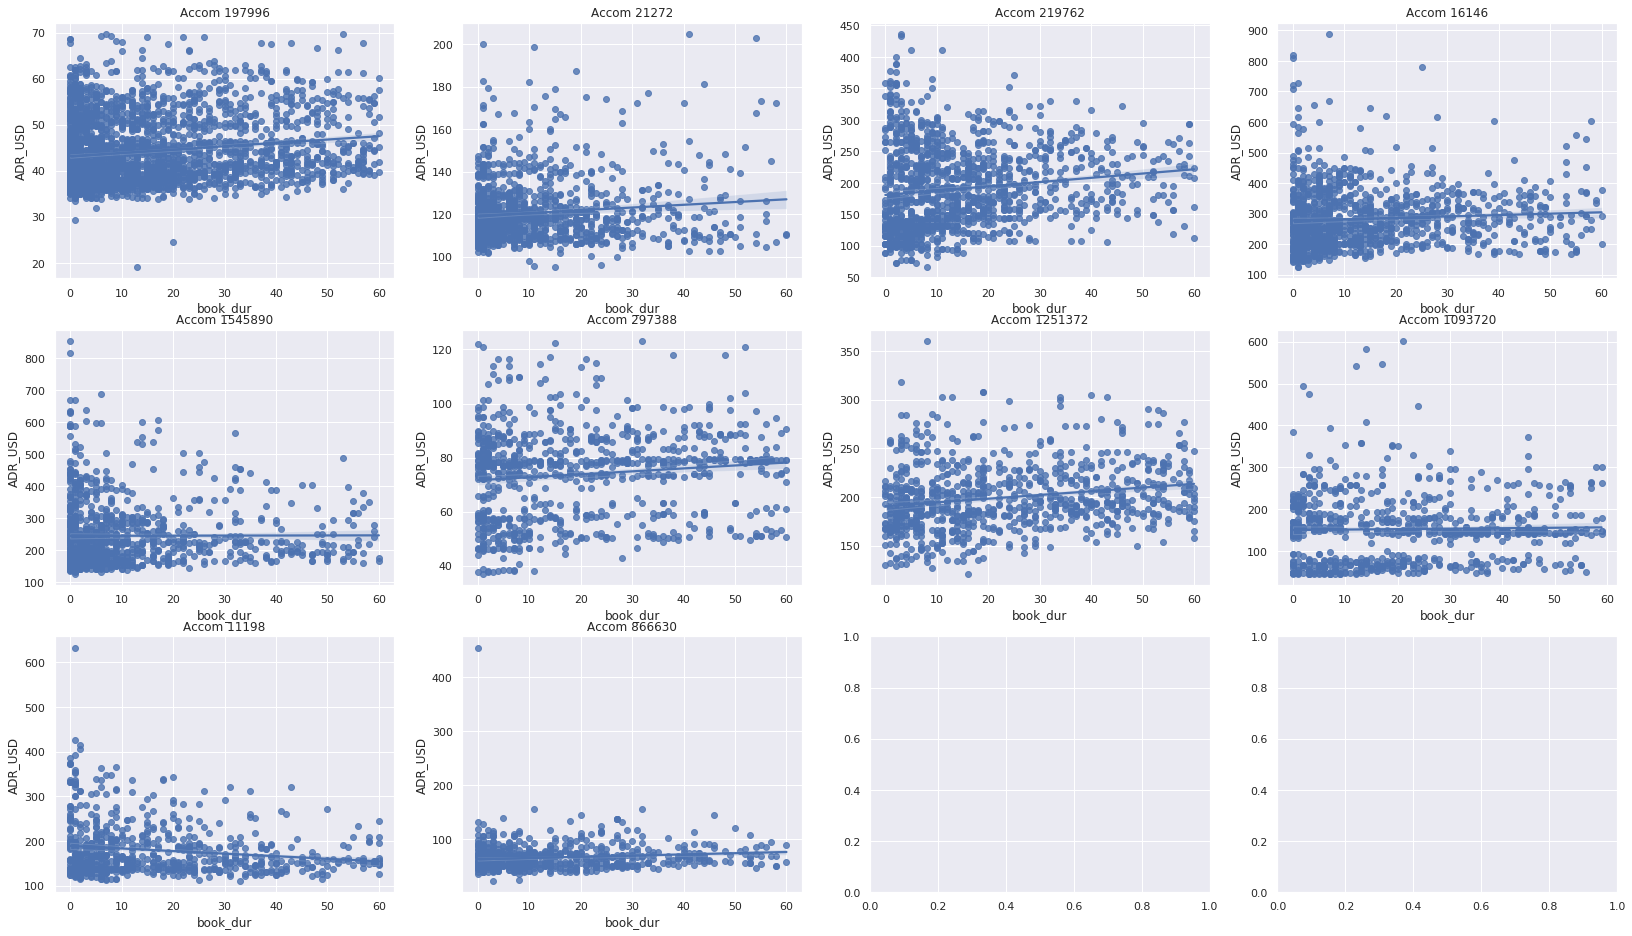

In [538]:
no_col = 4
no_row = 3
plot_index = 1

fig, axes = plt.subplots(ncols=no_col, nrows=no_row)
fig.set_size_inches(28,16)
for hotel, ax in zip(frequency_10, axes.flatten()):
    df_subset = df.loc[df['hotel_id'] == int(hotel)]
    df_subset['book_dur'] = df_subset['book_duration']/np.timedelta64(1,'D')
    city = df_subset.city_id.mode()[0]
    sns.set_style('darkgrid')
    sns.regplot(x='book_dur', y='ADR_USD', data=df_subset, fit_reg=True, ax=ax).set_title('Accom {}'.format(hotel))
#     plt.ylabel('ADR_USD')
#     plt.xlabel('Book Duration in Days')
#     plt.title('Book Duration v ADR USD for Hotel {}'.format(hotel))
    r = stats.pearsonr(df_subset['book_dur'], df_subset['ADR_USD'])
    print('Accom {} (City {}): {}'.format(hotel, city, round(r[0],2)))
    plot_index = plot_index + 1
    
plt.show()

In [350]:
dfx = df[df['hotel_id'] == 197996]
dfx[dfx['checkin_date']>pd.to_datetime('2016-12-01', format='%Y-%m-%d')]

,index,#,ADR_USD,booking_date,chain_hotel,checkin_date,checkout_date,city_id,hotel_id,star_rating,accom_type,stay_duration,book_duration
4054,4054,4055,55.44,2016-10-05,non-chain,2016-12-02,2016-12-04,9395,197996,3.5,Hotel,2 days,58 days
4646,4646,4647,40.34,2016-10-07,non-chain,2016-12-03,2016-12-04,9395,197996,3.5,Hotel,1 days,57 days
5158,5158,5159,41.92,2016-10-10,non-chain,2016-12-06,2016-12-07,9395,197996,3.5,Hotel,1 days,57 days
5279,5279,5280,54.76,2016-10-10,non-chain,2016-12-08,2016-12-09,9395,197996,3.5,Hotel,1 days,59 days
5661,5661,5662,46.00,2016-10-12,non-chain,2016-12-08,2016-12-09,9395,197996,3.5,Hotel,1 days,57 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22306,22306,22307,35.14,2016-12-30,non-chain,2016-12-30,2016-12-31,9395,197996,3.5,Hotel,1 days,0 days
22313,22313,22314,46.00,2016-12-30,non-chain,2016-12-31,2017-01-01,9395,197996,3.5,Hotel,1 days,1 days
22337,22337,22338,36.00,2016-12-30,non-chain,2016-12-31,2017-01-01,9395,197996,3.5,Hotel,1 days,1 days
22350,22350,22351,41.50,2016-12-31,non-chain,2016-12-31,2017-01-01,9395,197996,3.5,Hotel,1 days,0 days


/home/enipandav/.virtualenvs/enipy2020-py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Accom 197996 (City 9395): 0.15
Accom 21272 (City 9395): 0.03
Accom 219762 (City 16808): 0.35
Accom 16146 (City 16808): 0.33
Accom 1545890 (City 16808): 0.11
Accom 297388 (City 9395): -0.03
Accom 1251372 (City 5085): 0.33
Accom 1093720 (City 16808): 0.07
Accom 11198 (City 16808): -0.04
Accom 866630 (City 9395): -0.06


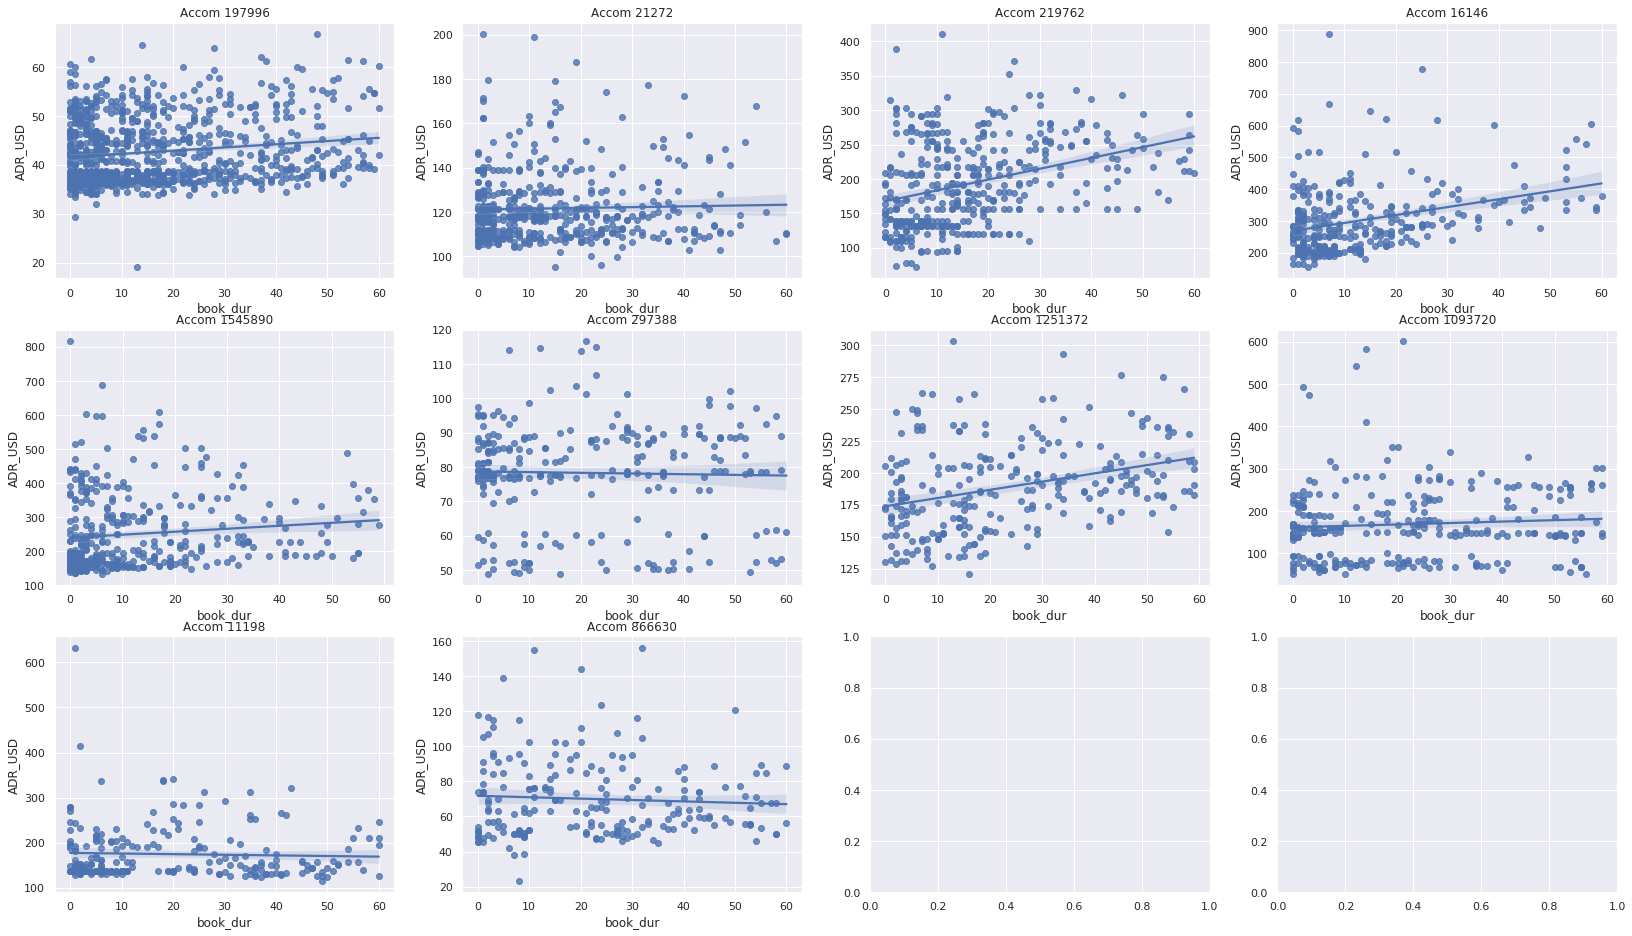

In [539]:
# december book in only
# december assume more bookings made early before check in
no_col = 4
no_row = 3
plot_index = 1

fig, axes = plt.subplots(ncols=no_col, nrows=no_row)
fig.set_size_inches(28,16)
for hotel, ax in zip(frequency_10, axes.flatten()):
    dfx = df.loc[df['hotel_id'] == int(hotel)]
    city = dfx.city_id.mode()[0]
    # only checkin dates in december month
    df_subset = dfx[dfx['checkin_date'] > pd.to_datetime('2016-12-01', format='%Y-%m-%d')]
    df_subset['book_dur'] = df_subset['book_duration']/np.timedelta64(1,'D')
    sns.set_style('darkgrid')
    sns.regplot(x='book_dur', y='ADR_USD', data=df_subset, fit_reg=True, ax=ax).set_title('Accom {}'.format(hotel))
    r = stats.pearsonr(df_subset['book_dur'], df_subset['ADR_USD'])
    print('Accom {} (City {}): {}'.format(hotel, city, round(r[0],2)))
    plot_index = plot_index + 1
    
plt.show()

#### let's try if we can use all features in city 16808 to predict the price

In [540]:
dfa = df.copy()

In [541]:
mapping_1 = {'non-chain': 0,
             'chain': 1}

mapping_2 = {'Hotel': 0, 
             'Serviced Apartment': 1, 
             'Hostel': 2,
             'Guest House / Bed & Breakfast': 3, 
             'Motel': 4, 
             'Apartment': 5, 
             'Resort': 6,
             'Ryokan': 7, 
             'Resort Villa': 8, 
             'Private Villa': 9, 
             'Bungalow': 10, 
             'Villa': 11,
             'Holiday Park / Caravan Park': 12, 
             'Capsule Hotel': 13, 
             'Love Hotel': 14,
             'Home': 15}

dfa['chain_hotel'] = dfa['chain_hotel'].replace(mapping_1)
dfa['accom_type'] = dfa['accom_type'].replace(mapping_2)
dfa['stay_duration'] = dfa['stay_duration']/np.timedelta64(1,'D')
dfa['book_duration'] = dfa['book_duration']/np.timedelta64(1,'D')

dfa.head()

,index,#,ADR_USD,booking_date,chain_hotel,checkin_date,checkout_date,city_id,hotel_id,star_rating,accom_type,stay_duration,book_duration
0,0,1,71.06,2016-08-02,0,2016-10-01,2016-10-02,9395,297388,2.5,0,1.0,60.0
1,1,2,76.56,2016-08-02,0,2016-10-01,2016-10-02,9395,298322,3.0,0,1.0,60.0
2,2,3,153.88,2016-08-02,1,2016-10-01,2016-10-02,9395,2313076,5.0,0,1.0,60.0
3,3,4,126.60,2016-08-04,0,2016-10-02,2016-10-03,9395,2240838,3.5,0,1.0,59.0
4,4,5,115.08,2016-08-04,0,2016-10-02,2016-10-03,9395,2240838,3.5,0,1.0,59.0


In [542]:
dfa = dfa[dfa['city_id']==16808]

In [543]:
dfb = dfa.drop(['index','#','booking_date','checkin_date','checkout_date','city_id','hotel_id'], axis=1)
dfb.reset_index(drop=True, inplace=True)
dfb.head()

,ADR_USD,chain_hotel,star_rating,accom_type,stay_duration,book_duration
0,293.42,0,3.0,0,3.0,59.0
1,38.94,0,1.0,2,1.0,58.0
2,38.94,0,1.0,2,1.0,58.0
3,112.70,0,3.0,0,1.0,60.0
4,291.64,0,4.0,0,2.0,60.0


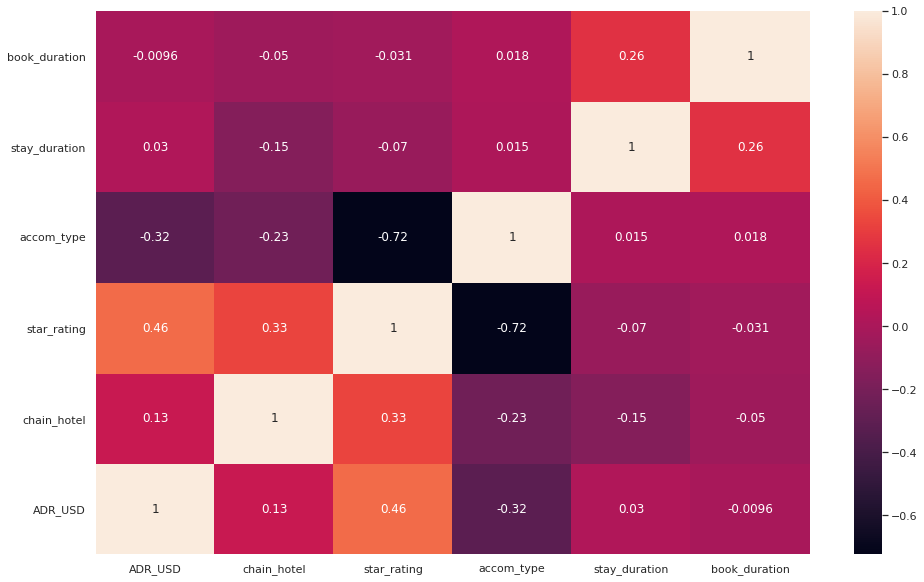

In [545]:
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(dfb.corr(), annot=True, ax=ax);
ax.set_ylim([0,6])
ax.set_yticklabels(ax.get_yticklabels(), rotation=0);

#### train test data

In [546]:
split_data = dfb.drop(['ADR_USD'], axis=1)

train1, test1, train2, test2 = model_selection.train_test_split(split_data,
                                                                dfb['ADR_USD'],
                                                                test_size=0.4,
                                                                train_size=0.6,
                                                                random_state=13)

In [547]:
mean = np.mean(dfb['ADR_USD'])
std = np.std(dfb['ADR_USD'])
print('mean price: {}'.format(mean))
print('standard deviation: {}'.format(std))

mean price: 218.8481770587078
standard deviation: 141.8593282118514


In [548]:
# linear regression
mlinear = linear_model.LinearRegression()
mlinear.fit(train1, train2)
mlinear_error = metrics.median_absolute_error(test2, mlinear.predict(test1))
print('Error for Linear Regression: {}'.format(mlinear_error))

Error for Linear Regression: 62.45506867670974


In [549]:
# ridge model
mridge = linear_model.Ridge()
mridge.fit(train1, train2)
mridge_error = metrics.median_absolute_error(test2, mridge.predict(test1))
print('Error for Ridge Model: {}'.format(mridge_error))

Error for Ridge Model: 62.469192325807796


In [550]:
# ada boost regressor
paramn = ['n_estimators', 'learning_rate', 'loss']
paramv = [[1], [1,2], ['linear']]
parameters = dict(zip(paramn, paramv))
regada = GridSearchCV(ensemble.AdaBoostRegressor(),
                      cv=3,
                      param_grid=parameters,
                      scoring='neg_median_absolute_error')
predictor = regada.fit(train1, train2)
regada_estimate = regada.best_estimator_

In [551]:
regada.best_score_

-61.09657342809138

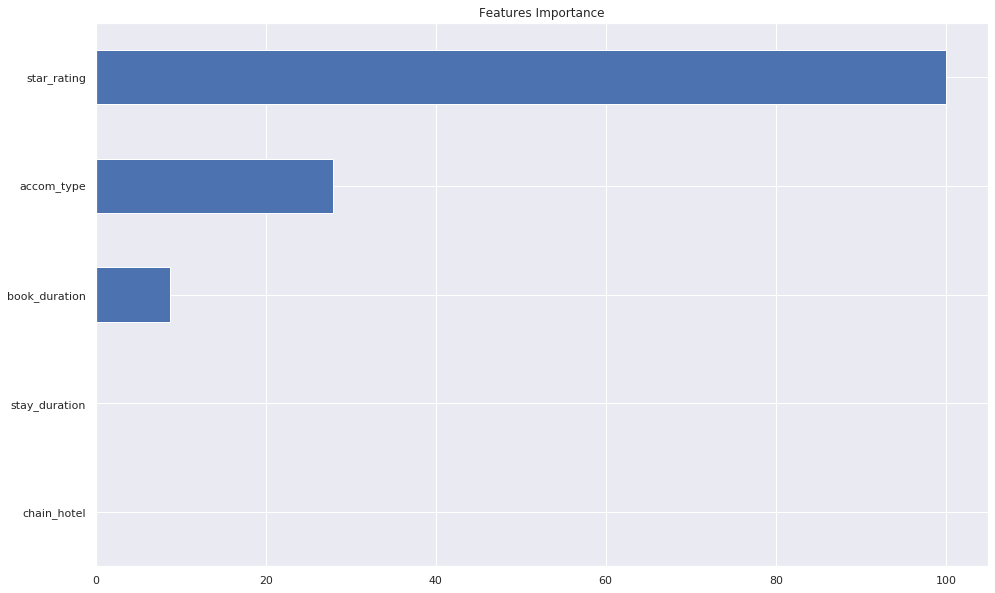

In [552]:
regada_imp = regada_estimate.feature_importances_
regada_score = 100.0 * (regada_imp/regada_imp.max())

regada_feature = pd.Series(regada_score, index=train1.columns).sort_values(ascending=True)

regada_feature.plot(kind='barh', figsize=(16,10), color='b', title='Features Importance')

In [ ]:
# gradient boost regressor
paramn = ['n_estimators', 'max_depth', 'learning_rate', 'loss', 'min_samples_split']
paramv = [[100,300,500], [5,6,7,8], [0.1,0.2], ['ls','lad'], [1,2]]
paramaters = dict(zip(paramn, paramv))
reggra = GridSearchCV(ensemble.GradientBoostingRegressor(),
                      cv=3,
                      param_grid=parameters,
                      scoring='neg_median_absolute_error')
predictor = reggra.fit(train1, train2)
reggra_estimate = reggra.best_estimator_

In [575]:
train1, test1, train2, test2 = model_selection.train_test_split(split_data,
                                                                dfb['ADR_USD'],
                                                                train_size = 0.4,
                                                                test_size = 0.6,
                                                                random_state=0)

clf = DecisionTreeRegressor(random_state=0)
clf.fit(train1, train2)
train_score = clf.score(train1, train2)
test_score = clf.score(test1, test2)
print('Training Accuracy: {}'.format(train_score))
print('Test Accuracy: {}'.format(test_score))

Training Accuracy: 0.6365562624428667
Test Accuracy: 0.42553598060597786


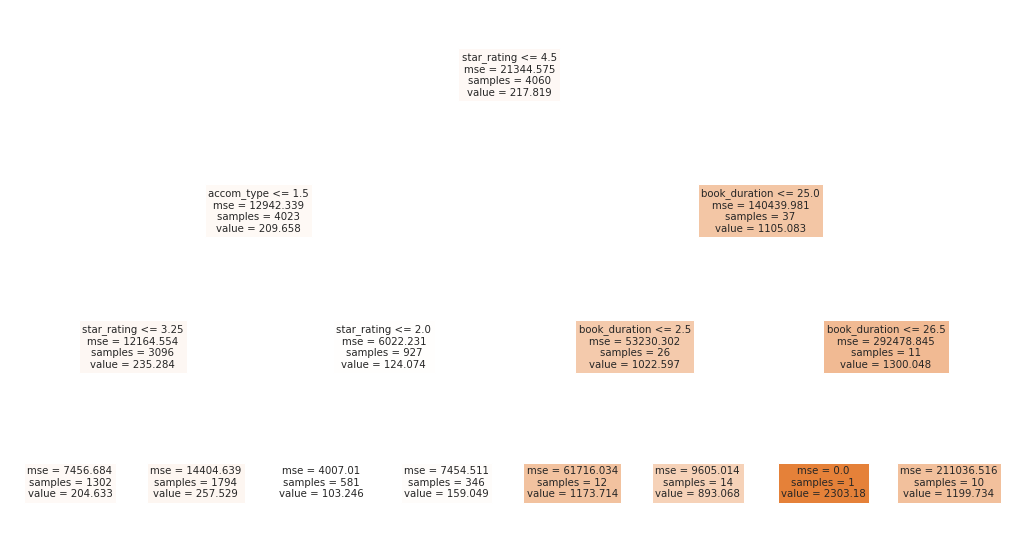

In [569]:
fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(clf,
                   feature_names=split_data.columns,
                   filled=True)